# Project: Wrangle and Analyze Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#gather">Gathering </a></li>
<li><a href="#assess">Assessing</a></li>
    <ul><a href=#quality>Quality</a></ul>
    <ul><a href=#tidiness>Tidiness</a></ul>
<li><a href="#clean">Cleaning</a></li> 
<li><a href="#store">Storing</a></li>
<li><a href="#analysis">Analysis and Visualization </a></li>
<li><a href="#ref">References</a></li>
</ul>

<a id='intro'></a>
#### Introduction 
In this project, I will gather, assess, and clean data then act on it through analysis and visualization.
Dataset that I will be wrangling is the tweet archive of Twitter user **@dog_rates**, also known as **WeRateDogs**.
**WeRateDogs** is a Twitter account that rates people's dogs with a humorous comment about the dog.

<a id='wrangling'></a>
# Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
%matplotlib inline 


<a id='gather'></a>
## Gathering 

In [12]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweet = pd.read_json('tweet-json.txt', lines=True)

In [7]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(file='image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

In [8]:
image_predictions = pd.read_table('image-predictions.tsv')

<a id='assess'></a>
## Assessing 

> **Visual and programmatic assessments were applied**

In [9]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [13]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [14]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [15]:
tweet.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [16]:
tweet.tail()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2353,2015-11-15 22:32:08+00:00,666020888022790149,666020888022790144,Here we have a Japanese Irish Setter. Lost eye...,False,"[0, 131]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666020881337073664, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,2535,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [17]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [20]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> **Rating numerator and denominator clearly there are incorrect values. For example there is denominator Zero and 170! Must be 10**

In [21]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [22]:
tweet.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [23]:
image_predictions.jpg_url.duplicated().sum()

66

In [24]:
image_predictions[image_predictions.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True
1944,861769973181624320,https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg,2,Arabian_camel,0.366248,False,house_finch,0.209852,False,cocker_spaniel,0.046403,True
1992,873697596434513921,https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg,1,laptop,0.153718,False,French_bulldog,0.099984,True,printer,0.077130,False
2041,885311592912609280,https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg,1,Labrador_retriever,0.908703,True,seat_belt,0.057091,False,pug,0.011933,True


In [25]:
image_predictions[image_predictions.jpg_url == 'https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True


In [26]:
image_predictions[image_predictions.jpg_url =='https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


> **Ensuring that duplicate in images are for all information not for images only**

In [27]:
image_predictions[image_predictions.p1_dog == False]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False


In [28]:
image_predictions.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
25,666362758909284353,https://pbs.twimg.com/media/CT9lXGsUcAAyUFt.jpg,1,guinea_pig,0.996496,False,skunk,0.002402,False,hamster,0.000461,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2021,880935762899988482,https://pbs.twimg.com/media/DDm2Z5aXUAEDS2u.jpg,1,street_sign,0.251801,False,umbrella,0.115123,False,traffic_light,0.069534,False
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [29]:
twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [30]:
twitter_archive.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
                              ...                        
2351    Here we have a 1949 1st generation vulpix. Enj...
2352    This is a purebred Piers Morgan. Loves to Netf...
2353    Here is a very happy pup. Big fan of well-main...
2354    This is a western brown Mitsubishi terrier. Up...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 2356, dtype: object

In [31]:
twitter_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/767754930266464257/photo/1                                                                                                                                                                                                                                              2
https://twitter.com/dog_rates/status/866334964761202691/photo/1,https://twitter.com/dog_rates/status/866334964761202691/photo/1                                                                                                                                                                              2
https://twitter.com/dog_rates/status/820749716845686786/photo/1,https://twitter.com/dog_rates/status/820749716845686786/photo/1                                                                                                                                                                              2
https://vine.co/v/ea0OwvPTx9l                                                              

In [32]:
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> **Rating denominator must be 10**

In [33]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

> **Rating numerator must be 10 or below**

In [34]:
twitter_archive.rating_denominator.isnull().sum()

0

In [35]:
twitter_archive.rating_numerator.isnull().sum()

0

In [36]:
twitter_archive.query('rating_numerator <= 10 & rating_denominator == 10').shape[0]

895

In [37]:
twitter_archive.query(' rating_numerator >= 10 & rating_denominator > 10 or rating_numerator <= 10 & rating_denominator > 10').shape[0]

20

In [38]:
twitter_archive.query('rating_numerator > 10 & rating_denominator <=10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2324,666421158376562688,NaN,NaN,2015-11-17 01:02:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*internally screaming* 12/10 https://t.co/YMcr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666421158...,12,10,None,None,None,None,None
2329,666373753744588802,NaN,NaN,2015-11-16 21:54:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Those are sunglasses and a jean jacket. 11/10 ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666373753...,11,10,None,None,None,None,None
2336,666273097616637952,NaN,NaN,2015-11-16 15:14:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Can take selfies 11/10 https://t.co/ws2AMaNwPW,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666273097...,11,10,None,None,None,None,None


In [39]:
rating_denominator_is_10 = twitter_archive.query('rating_numerator > 10 & rating_denominator <10')
rating_denominator_is_10.rating_denominator.value_counts()

7    1
0    1
Name: rating_denominator, dtype: int64

In [40]:
twitter_archive.query('rating_numerator > 10 & rating_denominator ==0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [41]:
twitter_archive.query('rating_numerator > 10 & rating_denominator ==7')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [42]:
twitter_archive.name.value_counts()

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
          ... 
Puff         1
Wiggles      1
Ralpher      1
Zara         1
Thor         1
Name: name, Length: 957, dtype: int64

> **Names were visualized manually using excel. None and a and some names are not names**

In [43]:
twitter_archive.query('name == "a"')['text']

56      Here is a pupper approaching maximum borkdrive...
649     Here is a perfect example of someone who has t...
801     Guys this is getting so out of hand. We only r...
1002    This is a mighty rare blue-tailed hammer sherk...
1004    Viewer discretion is advised. This is a terrib...
1017    This is a carrot. We only rate dogs. Please on...
1049    This is a very rare Great Alaskan Bush Pupper....
1193    People please. This is a Deadly Mediterranean ...
1207    This is a taco. We only rate dogs. Please only...
1340    Here is a heartbreaking scene of an incredible...
1351    Here is a whole flock of puppers.  60/50 I'll ...
1361    This is a Butternut Cumberfloof. It's not wind...
1368    This is a Wild Tuscan Poofwiggle. Careful not ...
1382    "Pupper is a present to world. Here is a bow f...
1499    This is a rare Arctic Wubberfloof. Unamused by...
1737    Guys this really needs to stop. We've been ove...
1785    This is a dog swinging. I really enjoyed it so...
1853    This i

In [44]:
twitter_archive.query('name == "an"')['text']

759     RT @dog_rates: This is an East African Chalupa...
1025    This is an Iraqi Speed Kangaroo. It is not a d...
1362    This is an East African Chalupa Seal. We only ...
2204    This is an Irish Rigatoni terrier named Berta....
2333    This is an extremely rare horned Parthenon. No...
2335    This is an Albanian 3 1/2 legged  Episcopalian...
2349    This is an odd dog. Hard on the outside but lo...
Name: text, dtype: object

In [45]:
twitter_archive.query('name == "space"')['text']

2030    This is space pup. He's very confused. Tries t...
Name: text, dtype: object

In [46]:
twitter_archive[twitter_archive.name == "space"]['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/671789708968640512/photo/1    1
Name: expanded_urls, dtype: int64

> **It's clearly some names are taken from the text wrongly**

In [47]:
twitter_archive.name.isnull().sum()

0

In [48]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [49]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [50]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [51]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [52]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [53]:
tweet.created_at

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2349   2015-11-16 00:24:50+00:00
2350   2015-11-16 00:04:52+00:00
2351   2015-11-15 23:21:54+00:00
2352   2015-11-15 23:05:30+00:00
2353   2015-11-15 22:32:08+00:00
Name: created_at, Length: 2354, dtype: datetime64[ns, UTC]

In [54]:
tweet_t1 = tweet[tweet.id == 666102155909144576]['full_text'].unique()
tweet_t1

array(['Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq'],
      dtype=object)

In [55]:
tweet_t2 = twitter_archive[twitter_archive.tweet_id == 666102155909144576]['text'].unique()
tweet_t2

array(['Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10 https://t.co/11LvqN4WLq'],
      dtype=object)

In [56]:
tweet_t1 == tweet_t2

array([ True])

In [57]:
tweet[tweet.id == 666102155909144576]['created_at']

2337   2015-11-16 03:55:04+00:00
Name: created_at, dtype: datetime64[ns, UTC]

In [58]:
twitter_archive[twitter_archive.tweet_id == 666102155909144576]['timestamp']

2339    2015-11-16 03:55:04 +0000
Name: timestamp, dtype: object

> **I was checking that values in columns in different tables are the same**

In [59]:
tweet.truncated.value_counts()

False    2354
Name: truncated, dtype: int64

In [60]:
tweet.display_text_range

0        [0, 85]
1       [0, 138]
2       [0, 121]
3        [0, 79]
4       [0, 138]
          ...   
2349    [0, 120]
2350    [0, 137]
2351    [0, 130]
2352    [0, 139]
2353    [0, 131]
Name: display_text_range, Length: 2354, dtype: object

In [61]:
tweet.entities

0       {'hashtags': [], 'symbols': [], 'user_mentions...
1       {'hashtags': [], 'symbols': [], 'user_mentions...
2       {'hashtags': [], 'symbols': [], 'user_mentions...
3       {'hashtags': [], 'symbols': [], 'user_mentions...
4       {'hashtags': [{'text': 'BarkWeek', 'indices': ...
                              ...                        
2349    {'hashtags': [], 'symbols': [], 'user_mentions...
2350    {'hashtags': [], 'symbols': [], 'user_mentions...
2351    {'hashtags': [], 'symbols': [], 'user_mentions...
2352    {'hashtags': [], 'symbols': [], 'user_mentions...
2353    {'hashtags': [], 'symbols': [], 'user_mentions...
Name: entities, Length: 2354, dtype: object

In [62]:
tweet.extended_entities

0       {'media': [{'id': 892420639486877696, 'id_str'...
1       {'media': [{'id': 892177413194625024, 'id_str'...
2       {'media': [{'id': 891815175371796480, 'id_str'...
3       {'media': [{'id': 891689552724799489, 'id_str'...
4       {'media': [{'id': 891327551943041024, 'id_str'...
                              ...                        
2349    {'media': [{'id': 666049244999131136, 'id_str'...
2350    {'media': [{'id': 666044217047650304, 'id_str'...
2351    {'media': [{'id': 666033409081393153, 'id_str'...
2352    {'media': [{'id': 666029276303482880, 'id_str'...
2353    {'media': [{'id': 666020881337073664, 'id_str'...
Name: extended_entities, Length: 2354, dtype: object

In [63]:
tweet.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2219
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [64]:
tweet.user

0       {'id': 4196983835, 'id_str': '4196983835', 'na...
1       {'id': 4196983835, 'id_str': '4196983835', 'na...
2       {'id': 4196983835, 'id_str': '4196983835', 'na...
3       {'id': 4196983835, 'id_str': '4196983835', 'na...
4       {'id': 4196983835, 'id_str': '4196983835', 'na...
                              ...                        
2349    {'id': 4196983835, 'id_str': '4196983835', 'na...
2350    {'id': 4196983835, 'id_str': '4196983835', 'na...
2351    {'id': 4196983835, 'id_str': '4196983835', 'na...
2352    {'id': 4196983835, 'id_str': '4196983835', 'na...
2353    {'id': 4196983835, 'id_str': '4196983835', 'na...
Name: user, Length: 2354, dtype: object

In [65]:
tweet.is_quote_status.value_counts()

False    2323
True       31
Name: is_quote_status, dtype: int64

In [66]:
tweet.retweet_count.value_counts()

1972     5
3652     5
83       5
146      4
61       4
        ..
8209     1
19       1
2068     1
30742    1
0        1
Name: retweet_count, Length: 1724, dtype: int64

In [67]:
tweet.retweeted.value_counts()

False    2354
Name: retweeted, dtype: int64

In [68]:
tweet.favorite_count.value_counts()

0        179
610        3
345        3
2918       3
1691       3
        ... 
33345      1
814        1
23108      1
2630       1
8143       1
Name: favorite_count, Length: 2007, dtype: int64

In [69]:
tweet.favorited.value_counts()

False    2346
True        8
Name: favorited, dtype: int64

In [70]:
tweet.possibly_sensitive.value_counts()

0.0    2211
Name: possibly_sensitive, dtype: int64

In [71]:
tweet.possibly_sensitive_appealable.value_counts()

0.0    2211
Name: possibly_sensitive_appealable, dtype: int64

In [72]:
tweet.lang.value_counts()

en     2336
und       7
in        3
nl        3
tl        1
eu        1
es        1
et        1
ro        1
Name: lang, dtype: int64

> **I checked every value in columns because I will not use all columns**

In [108]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator','rating_denominator']]


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,This is Bella. She hopes her smile made you sm...,5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,681340665377193984,I've been told there's a slight possibility he...,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of ...,26,10


In [101]:
twitter_archive_clean.query('tweet_id ==883482846933004288')['text'].value_counts()

This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948    1
Name: text, dtype: int64

In [102]:
twitter_archive_clean.query('tweet_id ==832215909146226688')['text'].value_counts()

RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…    1
Name: text, dtype: int64

In [103]:
twitter_archive_clean.query('tweet_id ==786709082849828864')['text'].value_counts()

This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS    1
Name: text, dtype: int64

In [104]:
twitter_archive_clean.query('tweet_id ==778027034220126208')['text'].value_counts()

This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq    1
Name: text, dtype: int64

In [105]:
twitter_archive_clean.query('tweet_id ==681340665377193984')['text'].value_counts()

I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace    1
Name: text, dtype: int64

In [106]:
twitter_archive_clean.query('tweet_id ==680494726643068929')['text'].value_counts()

Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD    1
Name: text, dtype: int64

> **All of them should be 10. because the scale is from 1 to 10 with no decimal scale.**
> **But two of them got 5 in the rating_numerator column and this need to be fix**

<a id='quality'></a>
#### Quality Issues

##### `image_predictions` table
- <a href="#issue1">**issue#1**</a> Duplicate images in *jpg_url* column **DONE**
- <a href="#issue2">**issue#2**</a> Dog picture not clear or other animal picture **DONE**
- <a href="#issue3">**issue#3**</a> Drop not important column (*img_num, p1_conf, p2_conf, p3_conf*) **DONE**

##### `twitter_archive` table 
- <a href="#issue4">**issue#4**</a> Erroneous datatypes in column (*timestamp*) **DONE**
- <a href="#issue5">**issue#5**</a> Drop unimportant columns (*in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp and source*) 6 columns **DONE**
- <a href="#issue6">**issue#6**</a> Inconsistent data in columns (*rating_numerator and rating_denominator*) **DONE**
- <a href="#issue7">**issue#7**</a> Inaccurate data in column *name* like (None, a, such, quite, not, one, incredibly, an, very, just, my, getting, actually, this, unacceptable, all, infuriating, by, officially and space ) **DONE**
- <a href="#issue8">**issue#8**</a> Inaccurate data in columns *doggo, floofer, pupper and puppo* **DONE**
- <a href="#issue9">**issue#9**</a> Dog names in *name* column starts with a capital letter **DONE**
- <a href="#issue12">**issue#12**</a> Inconsistent columns name in `twitter_archive` and `tweet` tables (*id, created_at and full_text*) from `tweet` table and (*tweet_id, timestamp and text*) from  `twitter_archive` table **DONE**
- <a href="#issue14">**issue#14**</a> Inconsistent data in column *rating_numerator*. Decimal numbers need to be fix **DONE**

##### `tweet` table
- <a href="#issue10">**issue#10**</a> Drop unimportant columns (*id_str, truncated, display_text_range, entities, extended_entities, source, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable, lang, retweeted_status, quoted_status_id, quoted_status_id_str and quoted_status*) 26 columns **DONE**

<a id='tidiness'></a>
#### Tidiness Issues
- <a href="#issue11">**issue#11**</a> Four variables in four columns in `twitter_archive` table that should be in one column *dog_stage* (*doggo, floofer, pupper and puppo*) **DONE**
- <a href="#issue13">**issue#13**</a> One table should be exist

<a id='clean'></a>
## Cleaning 

In [233]:
# make copies of original tables
image_predictions_clean = image_predictions.copy()
twitter_archive_clean = twitter_archive.copy()
tweet_clean = tweet.copy()

<a id='issue1'></a>
**issue#1** 
#### Define
Remove duplicate images in *jpg_url* column 

#### Code

In [234]:
image_predictions_clean.jpg_url.drop_duplicates(inplace=True)

#### Test

In [235]:
image_predictions_clean.jpg_url.duplicated().sum()

0

<a id='issue2'></a>
**issue#2** 
#### Define
Delete dog pictures that are not clear or other animals that have false predictions on both predictable

#### Code

In [236]:
false_pic = image_predictions_clean[ (image_predictions_clean['p1_dog'] == False) & (image_predictions_clean['p2_dog'] == False) &
                                    (image_predictions_clean['p3_dog']== False) ].index
image_predictions_clean.drop(false_pic , inplace=True)

#### Test

In [237]:
image_predictions_clean.query('p1_dog == False & p2_dog == False & p3_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


<a id='issue3'></a>
**issue#3**
#### Define
Delete *img_num, p1_conf, p2_conf and p3_conf* columns that are unimportant to my analysis

#### Code

In [238]:
image_predictions_clean.drop(['img_num','p1_conf','p2_conf','p3_conf'], axis=1 , inplace=True)

#### Test

In [239]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  1751 non-null   int64 
 1   jpg_url   1751 non-null   object
 2   p1        1751 non-null   object
 3   p1_dog    1751 non-null   bool  
 4   p2        1751 non-null   object
 5   p2_dog    1751 non-null   bool  
 6   p3        1751 non-null   object
 7   p3_dog    1751 non-null   bool  
dtypes: bool(3), int64(1), object(4)
memory usage: 87.2+ KB


<a id='issue12'></a>
**issue#12**
#### Define
 Inconsistent columns name in "twitter_archive" and "tweet" tables.
 For `tweet_clean` column, I changed only id and full_text to tweed_id and text.
 For `twitter_archive_clean`, I changed only timestamp to created_at.
 I need these steps before merge DataFrames

#### Code

In [240]:
tweet_clean.rename(columns={'id':'tweet_id', 'full_text':'text'}, inplace=True)

In [241]:
twitter_archive_clean.rename(columns={'timestamp':'created_at'}, inplace=True)

#### Test

In [242]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   text                           2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [243]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   created_at                  2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

<a id='issue4'></a>
**issue#4**
#### Define
*timestamp* column is no longer exsits. I change it to "created_at" for consistent purpose. Now I have to change the data type from object (string) to datetime      

#### Code

In [244]:
twitter_archive_clean.created_at = pd.to_datetime(twitter_archive_clean['created_at'], utc='ns' )

#### Test

In [245]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   created_at                  2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

<a id='issue5'></a>
**issue#5**
#### Define
delete unimportant columns (*in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source*) 6 columns. These columns will not be used in the analysis process

#### Code

In [246]:
twitter_archive_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id'
                           ,'retweeted_status_timestamp','source'], axis=1, inplace=True)

#### Test

In [247]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2356 non-null   int64              
 1   created_at          2356 non-null   datetime64[ns, UTC]
 2   text                2356 non-null   object             
 3   expanded_urls       2297 non-null   object             
 4   rating_numerator    2356 non-null   int64              
 5   rating_denominator  2356 non-null   int64              
 6   name                2356 non-null   object             
 7   doggo               2356 non-null   object             
 8   floofer             2356 non-null   object             
 9   pupper              2356 non-null   object             
 10  puppo               2356 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 202.6+ KB


<a id='issue7'></a>
**issue#7**
#### Define
Convert wrong names with null. 

#### Code

In [248]:
twitter_archive_clean.name = twitter_archive_clean.name.replace(['None', 'a','such', 'quite', 'not', 'one', 'incredibly', 'an', 'very', 'just', 'my', 'getting'
                                          , 'actually', 'this', 'unacceptable', 'all', 'infuriating', 'by', 'officially', 'space'],np.NaN)

#### Test

In [249]:
twitter_archive_clean.query('name=="None"or name=="a"or name=="such"or name=="quite"or name=="not"or name=="one"or name =="incredibly"or name=="an"or name=="very"or name=="officially"')

,tweet_id,created_at,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [250]:
twitter_archive_clean.query('name=="just"or name=="my"or name=="getting"or name=="actually"or name=="this"or name=="unacceptable"or name=="all"or name=="infuriating"or name=="by"or name=="space"')

,tweet_id,created_at,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<a id='issue14'></a>
**issue#14**


#### Define

Six observations got wrong rating numerator than the actual rating in the text. From the text all of them should be 10, because the scale of rating is from 1 to 10 with no decimal numbers. 

There are two rating numerator that will be changed to 10. The others will be decreased to 10 in **issue#6** 

#### Code

In [251]:
twitter_archive_clean.at[45,'rating_numerator'] = 10

In [254]:
twitter_archive_clean.at[1689,'rating_numerator'] = 10

#### Test

In [252]:
twitter_archive_clean.query('tweet_id ==883482846933004288')['rating_numerator']

45    10
Name: rating_numerator, dtype: int64

In [255]:
twitter_archive_clean.query('tweet_id ==681340665377193984')['rating_numerator']

1689    10
Name: rating_numerator, dtype: int64

<a id='issue6'></a>
 **issue#6**
#### Define

1- Rating denominator that having more than 10 will be decreased and below than 10 will be deleted

2- Rating numerator that having more than 10 will be decraesed to 10 and values less than 10 will not be changed

#### Code

In [256]:
twitter_archive_clean = twitter_archive_clean.drop(twitter_archive_clean[(twitter_archive_clean.rating_denominator<10)].index)

In [257]:
twitter_archive_clean['rating_denominator'] = np.where((twitter_archive_clean.rating_denominator >10), 10 , twitter_archive_clean.rating_denominator)

In [258]:
twitter_archive_clean['rating_numerator'] = np.where((twitter_archive_clean.rating_numerator >10), 10 , twitter_archive_clean.rating_numerator)

#### Test

In [259]:
twitter_archive_clean.rating_denominator.value_counts()

10    2353
Name: rating_denominator, dtype: int64

In [260]:
twitter_archive_clean.rating_numerator.value_counts()

10    1916
9      158
8      102
7       55
5       35
6       32
3       19
4       17
2        9
1        8
0        2
Name: rating_numerator, dtype: int64

In [262]:
twitter_archive_clean[twitter_archive_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['tweet_id','text', 'rating_numerator','rating_denominator']]

C:\Users\Az\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,This is Bella. She hopes her smile made you sm...,10,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who liv...",10,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly...",10,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. ...,10,10
1689,681340665377193984,I've been told there's a slight possibility he...,10,10
1712,680494726643068929,Here we have uncovered an entire battalion of ...,10,10


<a id='issue9'></a>
**issue#9**
#### Define
Dog names starting with a capital letter. I changed all names to lowercase

#### Code

In [263]:
twitter_archive_clean.name = twitter_archive_clean['name'].str.lower()

#### Test

In [264]:
twitter_archive_clean.name

0        phineas
1          tilly
2         archie
3          darla
4       franklin
          ...   
2351         NaN
2352         NaN
2353         NaN
2354         NaN
2355         NaN
Name: name, Length: 2353, dtype: object

<a id='issue8'></a>
**issue#8**
#### Define
Replace the wrong value "None" to null 

#### Code

In [265]:
twitter_archive_clean.doggo = twitter_archive_clean.doggo.replace('None',np.NaN)

In [266]:
twitter_archive_clean.floofer = twitter_archive_clean.floofer.replace('None',np.NaN)

In [267]:
twitter_archive_clean.pupper = twitter_archive_clean.pupper.replace('None',np.NaN)

In [268]:
twitter_archive_clean.puppo = twitter_archive_clean.puppo.replace('None',np.NaN)

#### Test

In [269]:
twitter_archive_clean.doggo.value_counts()

doggo    97
Name: doggo, dtype: int64

In [270]:
twitter_archive_clean.floofer.value_counts()

floofer    10
Name: floofer, dtype: int64

In [271]:
twitter_archive_clean.pupper.value_counts()

pupper    257
Name: pupper, dtype: int64

In [272]:
twitter_archive_clean.puppo.value_counts()

puppo    30
Name: puppo, dtype: int64

<a id='issue11'></a>
**issue#11**
#### Define
Create a new column *dog_stage* instead of 4 columns of one category

#### Code

In [273]:
twitter_archive_clean = pd.melt(twitter_archive_clean , id_vars=['tweet_id',
                                                                 'created_at',
                                                                 'text','expanded_urls',
                                                                 'rating_numerator'
                                                                 ,'rating_denominator','name'],
                                var_name='dog', value_name='dog_stage')

twitter_archive_clean = twitter_archive_clean.drop('dog',1 )
#This code to drop dog column
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', keep='first')
#there will be duplicates on ids, so I took only one id which is the first one 

#### Test

In [274]:
twitter_archive_clean.dog_stage.value_counts()
# After running this code we notice there are decrease in some of the stages. This is due to some dogs have more than one stage
# and only one stage is taken 

pupper     245
doggo       97
puppo       29
floofer      9
Name: dog_stage, dtype: int64

In [275]:
twitter_archive_clean.shape[0]

2353

In [276]:
twitter_archive_clean.duplicated().sum()

0

<a id='issue10'></a>
**issue#10**
#### Define
Drop unimportant columns (*id_str, truncated, display_text_range, entities, extended_entities, source, in_reply_to_status_id, in_reply_to_status_id_str, in_reply_to_user_id, in_reply_to_user_id_str, in_reply_to_screen_name, user, geo, coordinates, place, contributors, is_quote_status, favorited, retweeted, possibly_sensitive, possibly_sensitive_appealable, lang, retweeted_status, quoted_status_id, quoted_status_id_str and quoted_status*) 26 columns

#### Code

In [277]:
tweet_clean.drop(['id_str','truncated','display_text_range','entities','extended_entities','source','in_reply_to_status_id',
                 'in_reply_to_status_id_str','in_reply_to_user_id','in_reply_to_user_id_str','in_reply_to_screen_name',
                 'user','geo','coordinates','place','contributors','is_quote_status','favorited','retweeted','possibly_sensitive',
                 'possibly_sensitive_appealable','lang','retweeted_status','quoted_status_id','quoted_status_id_str',
                 'quoted_status'], axis=1 , inplace=True)

#### Test


In [278]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   created_at      2354 non-null   datetime64[ns, UTC]
 1   tweet_id        2354 non-null   int64              
 2   text            2354 non-null   object             
 3   retweet_count   2354 non-null   int64              
 4   favorite_count  2354 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(1)
memory usage: 92.1+ KB


<a id='issue13'></a>
**issue#13**
#### Define 
Merge all tables together in two steps. 

#### Code

In [279]:
df_dog_rates = pd.merge(twitter_archive_clean, image_predictions_clean , how='left',
                       on=['tweet_id'] )
df_dog_rates = df_dog_rates[df_dog_rates.jpg_url.notnull()]

#### Test

In [280]:
df_dog_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 2352
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1749 non-null   int64              
 1   created_at          1749 non-null   datetime64[ns, UTC]
 2   text                1749 non-null   object             
 3   expanded_urls       1749 non-null   object             
 4   rating_numerator    1749 non-null   int64              
 5   rating_denominator  1749 non-null   int64              
 6   name                1238 non-null   object             
 7   dog_stage           270 non-null    object             
 8   jpg_url             1749 non-null   object             
 9   p1                  1749 non-null   object             
 10  p1_dog              1749 non-null   object             
 11  p2                  1749 non-null   object             
 12  p2_dog              1749 non-null 

#### Code

In [281]:
dog_rates = pd.merge(df_dog_rates, tweet_clean , how='left', on=['tweet_id','created_at','text'])

#### Test

In [282]:
dog_rates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 1748
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1749 non-null   int64              
 1   created_at          1749 non-null   datetime64[ns, UTC]
 2   text                1749 non-null   object             
 3   expanded_urls       1749 non-null   object             
 4   rating_numerator    1749 non-null   int64              
 5   rating_denominator  1749 non-null   int64              
 6   name                1238 non-null   object             
 7   dog_stage           270 non-null    object             
 8   jpg_url             1749 non-null   object             
 9   p1                  1749 non-null   object             
 10  p1_dog              1749 non-null   object             
 11  p2                  1749 non-null   object             
 12  p2_dog              1749 non-null 

<a id='store'></a>
## Storing 

In [283]:
#Storing the new table in csv file
dog_rates.to_csv('twitter_archive_master.csv', index=False )

<a id='analysis'></a>
## Analysis and Visualization 

>**<ol> 1- Rating 10 out of 10 starts from the lower quartile </ol>**
>**<ol> 2- Interquartile of retweet is 3505-665= 2840 </ol>**
>**<ol> 3- Interquartile of favorite is 9458 </ol>**
>**<ol> 4- Most of favorites on tweets are below 20000 </ol>**
>**<ol> 5- Most of retweets on tweets are below 10000 </ol>**
>**<ol> 6- The Most favorite tweet is 132810 </ol>**
>**<ol> 7- The Most retweet tweet is 79515 </ol>**

In [284]:
dog_rates.describe()

,tweet_id,rating_numerator,rating_denominator,retweet_count,favorite_count
count,1.749000e+03,1749.000000,1749.0,1748.000000,1748.000000
mean,7.415929e+17,9.658662,10.0,3045.792334,8902.141876
std,6.814721e+16,1.013417,0.0,5207.943874,12477.130844
min,6.660209e+17,0.000000,10.0,16.000000,0.000000
25%,6.783345e+17,10.000000,10.0,665.000000,1860.750000
50%,7.182469e+17,10.000000,10.0,1505.000000,4145.500000
75%,7.964848e+17,10.000000,10.0,3497.500000,11278.750000
max,8.921774e+17,10.000000,10.0,79515.000000,132810.000000


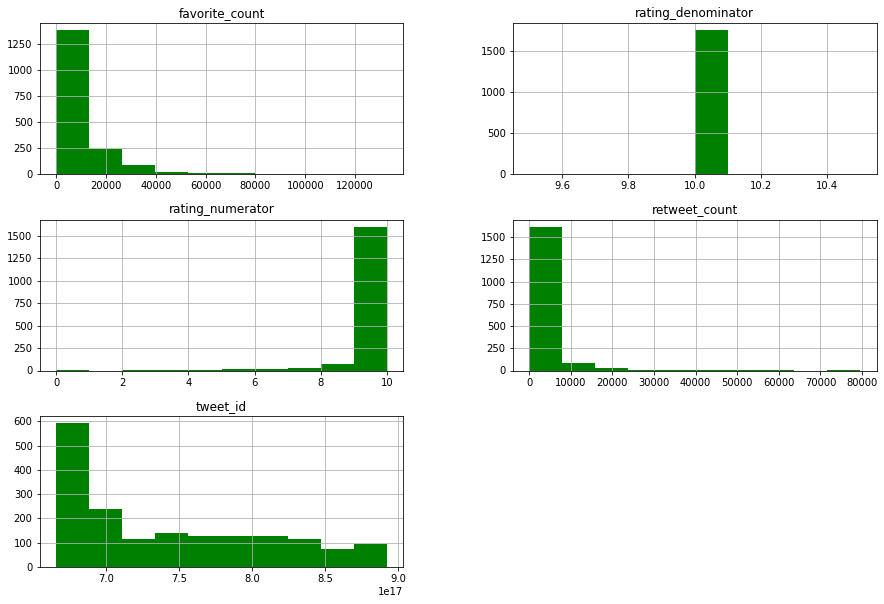

In [285]:
dog_rates.hist(figsize=(15,10), color='green' );

> **The most dogs breed on this dataset are golden and Labrador retriever**

In [286]:
dog_rates.query('p1_dog == True ')['p1'].value_counts() , dog_rates.query('p2_dog == True')['p2'].value_counts(),dog_rates.query('p3_dog == True')['p3'].value_counts()

(golden_retriever      149
 Labrador_retriever    100
 Pembroke               89
 Chihuahua              83
 pug                    57
                      ... 
 EntleBucher             1
 clumber                 1
 standard_schnauzer      1
 groenendael             1
 Japanese_spaniel        1
 Name: p1, Length: 111, dtype: int64,
 Labrador_retriever    104
 golden_retriever       92
 Cardigan               73
 Chihuahua              44
 Pomeranian             42
                      ... 
 komondor                1
 standard_schnauzer      1
 Japanese_spaniel        1
 EntleBucher             1
 Kerry_blue_terrier      1
 Name: p2, Length: 113, dtype: int64,
 Labrador_retriever    78
 Chihuahua             58
 golden_retriever      48
 Eskimo_dog            38
 kelpie                35
                       ..
 briard                 2
 standard_schnauzer     1
 affenpinscher          1
 Kerry_blue_terrier     1
 Sussex_spaniel         1
 Name: p3, Length: 116, dtype: int64)

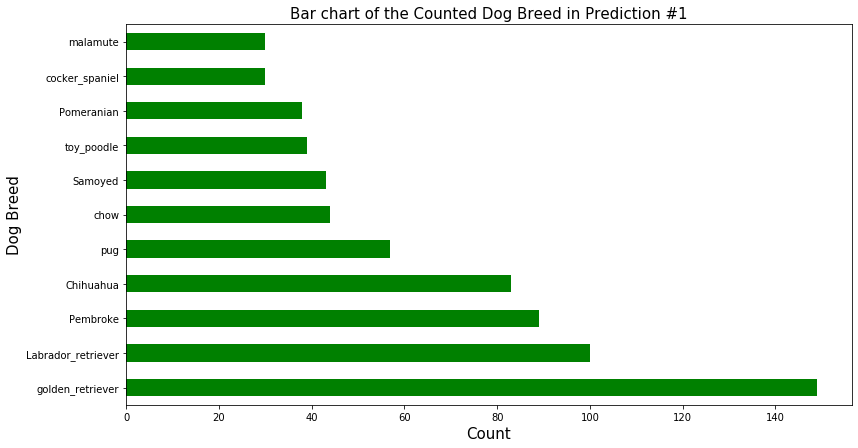

In [287]:
dog_breed_1 = dog_rates.groupby('p1').filter(lambda x: len(x) >=30)

dog_breed_1['p1'].value_counts().plot(kind='barh', figsize=(13,7), color='g')
plt.title('Bar chart of the Counted Dog Breed in Prediction #1', fontsize= 15)
plt.xlabel('Count', fontsize= 15)
plt.ylabel('Dog Breed', fontsize= 15);

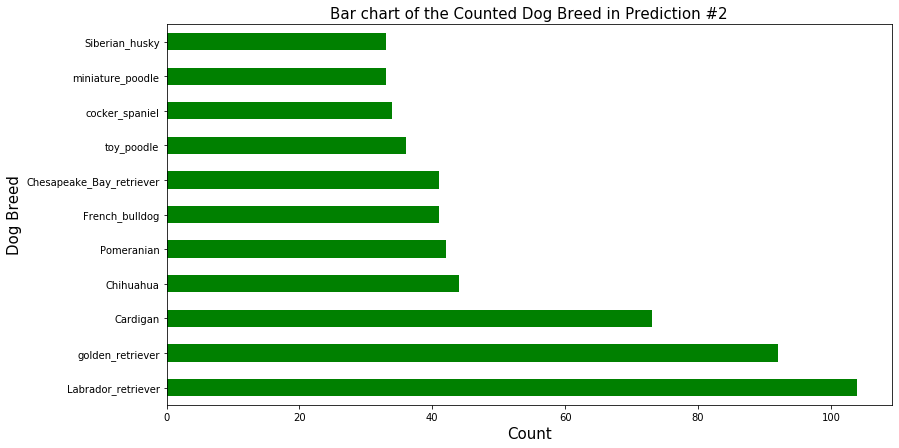

In [288]:
dog_breed_2 = dog_rates.groupby('p2').filter(lambda x: len(x) >=30)

dog_breed_2['p2'].value_counts().plot(kind='barh' , figsize=(13,7), color='g')
plt.title('Bar chart of the Counted Dog Breed in Prediction #2', fontsize= 15)
plt.xlabel('Count', fontsize= 15)
plt.ylabel('Dog Breed', fontsize= 15);

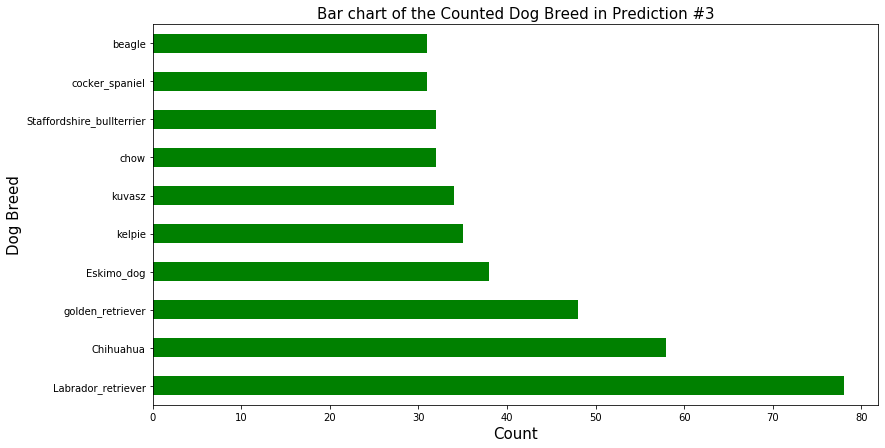

In [289]:
dog_breed_3 = dog_rates.groupby('p3').filter(lambda x: len(x) >=30)

dog_breed_3['p3'].value_counts().plot(kind='barh', figsize=(13,7), color='g')
plt.title('Bar chart of the Counted Dog Breed in Prediction #3', fontsize= 15)
plt.xlabel('Count', fontsize= 15)
plt.ylabel('Dog Breed', fontsize= 15);

>**<ol>8- The most favorite tweet got 10 ot of 10 rating</ol>**
>**<ol>9- Also, the lowest favorite tweet got 10 ot of 10 rating</ol>**
>**<ol>10- The most retweet tweet got 10 ot of 10 rating</ol>**
>**<ol>11- Also, the lowest retweet tweet got 10 ot of 10 rating</ol>**

In [290]:
# This function is to find the maximum and minimum values on a specific column 
def find_minmax(x):
    #use the function 'idmin' to find the index of lowest value
    min_index = dog_rates[x].idxmin()
    #use the function 'idmax' to find the index of Highest value
    max_index = dog_rates[x].idxmax()
    high = pd.DataFrame(dog_rates.loc[max_index,:])
    low = pd.DataFrame(dog_rates.loc[min_index,:])
    return pd.concat([high,low],axis = 1)

find_minmax('favorite_count')

,259,3
tweet_id,822872901745569793,770093767776997377
created_at,2017-01-21 18:26:02+00:00,2016-08-29 03:00:36+00:00
text,Here's a super supportive puppo participating ...,RT @dog_rates: This is just downright precious...
expanded_urls,https://twitter.com/dog_rates/status/822872901...,https://twitter.com/dog_rates/status/741067306...
rating_numerator,10,10
rating_denominator,10,10
name,NaN,NaN
dog_stage,puppo,doggo
jpg_url,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg
p1,Lakeland_terrier,golden_retriever


In [291]:
find_minmax('retweet_count')

,20,1733
tweet_id,744234799360020481,666102155909144576
created_at,2016-06-18 18:26:18+00:00,2015-11-16 03:55:04+00:00
text,Here's a doggo realizing you can stand in a po...,Oh my. Here you are seeing an Adobe Setter giv...
expanded_urls,https://twitter.com/dog_rates/status/744234799...,https://twitter.com/dog_rates/status/666102155...
rating_numerator,10,10
rating_denominator,10,10
name,NaN,NaN
dog_stage,doggo,NaN
jpg_url,https://pbs.twimg.com/ext_tw_video_thumb/74423...,https://pbs.twimg.com/media/CT54YGiWUAEZnoK.jpg
p1,Labrador_retriever,English_setter


>**Even though most of the images are above 8 rate, favorites and retweets don't depend on tweet ratings**
>**<ol>12- Average favorites on tweets at the Zero rate</ol>**
>**<ol>13- Average retweets on tweets at both Zero and 10 ratings</ol>**

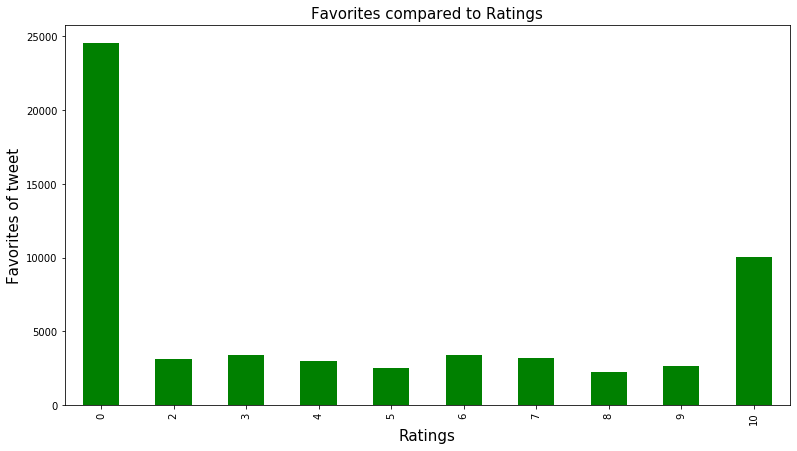

In [292]:
dog_rates.groupby('rating_numerator').favorite_count.mean().plot(kind='bar', figsize=(13,7), color='g');
plt.title('Favorites compared to Ratings', fontsize=15)
plt.xlabel('Ratings', fontsize= 15)
plt.ylabel('Favorites of tweet', fontsize= 15);

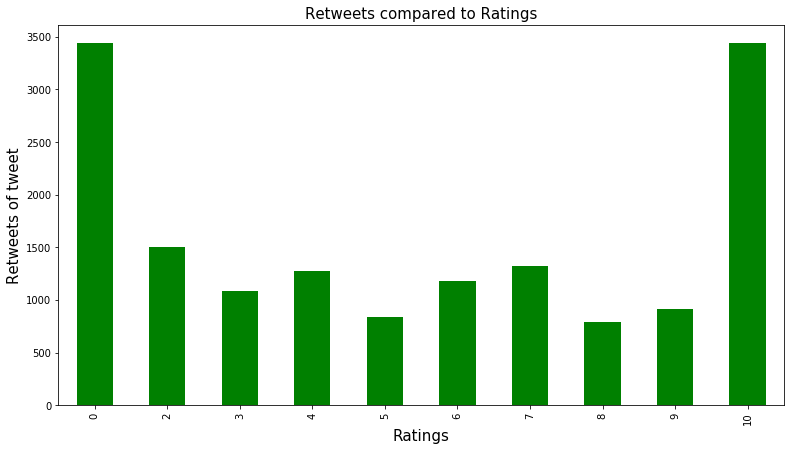

In [293]:
dog_rates.groupby('rating_numerator').retweet_count.mean().plot(kind='bar', figsize=(13,7), color='g');
plt.title('Retweets compared to Ratings', fontsize=15)
plt.xlabel('Ratings', fontsize= 15)
plt.ylabel('Retweets of tweet', fontsize= 15);

>**<ol>14- Most of data points are below 40000 favorites and below 10000 retweets</ol>**
>**<ol>15- Relationship between favorites and retweets are postive</ol>**

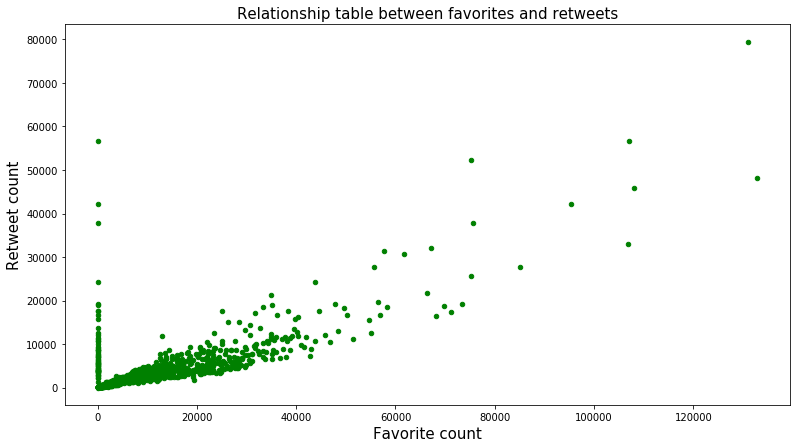

In [294]:
dog_rates.plot.scatter(y='retweet_count',x='favorite_count', color='g', figsize=(13,7))
plt.title('Relationship table between favorites and retweets', fontsize=15)
plt.xlabel('Favorite count', fontsize= 15)
plt.ylabel('Retweet count', fontsize= 15);

<a id='ref'></a>
#### References: 

[Loading a file with more than one line of JSON into Pandas] \
[Delete rows based on multiple conditions on different columns]


[Loading a file with more than one line of JSON into Pandas]: <https://stackoverflow.com/questions/30088006/loading-a-file-with-more-than-one-line-of-json-into-pandas>
[Delete rows based on multiple conditions on different columns]: <https://thispointer.com/python-pandas-how-to-drop-rows-in-dataframe-by-conditions-on-column-values/>